In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [5]:
# check where you stored the file in order to open it!
df= pd.read_csv(r'..\labeledTrainData.tsv.zip', compression='zip', delimiter='\t')

In [6]:
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [138]:
# creating the nlp obejct
nlp = spacy.load("en_core_web_sm")

# defining the stop_words and punctuations we want to remove
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [168]:
# Loop to get just the adjectives from each review

words_adj = []

for line in df['review']:
    
    doc= nlp(line)
    
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.pos_ == 'ADJ']
    
    words_adj.append(tokens)

In [174]:
# create a new column with the adjectives
df['words_adj'] = pd.Series(words_adj)

df.head()

,id,sentiment,review,words_adj
0,5814_8,1,With all this stuff going down at the moment w...,"[odd, certain, cool, guilty, innocent, subtle,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[entertaining, great, recreate, classic, stand..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[welcome, secret, primal, fearsome, scientific..."
3,3630_4,0,It must be assumed that those who praised this...,"[great, unmitigated, leaden, lugubrious, quest..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[trashy, unpretentious, pre, -, false, serious..."


### Most Common Positive Adjectives

In [184]:
# first, get just the adjectives from positive reviews

positive_adj= df[df['sentiment']==1]['words_adj']

pos_words= [line for line in positive_adj for line in set(line)]

pos_adj_count= Counter(pos_words).most_common(10)

print(pos_adj_count)

[('good', 6270), ('great', 4372), ('other', 3416), ('more', 2917), ('many', 2775), ('first', 2492), ('little', 2364), ('old', 1937), ('real', 1855), ('young', 1790)]


### Most Common Negative Adjectives

In [186]:
# first, get just the adjectives from positive reviews

negative_adj= df[df['sentiment']==0]['words_adj']

neg_words= [line for line in negative_adj for line in set(line)]

neg_adj_count= Counter(neg_words).most_common(10)

print(neg_adj_count)

[('bad', 5646), ('good', 5443), ('other', 3200), ('more', 2597), ('first', 2256), ('little', 2219), ('many', 2215), ('great', 2174), ('well', 2140), ('only', 1949)]


### Plotting Results

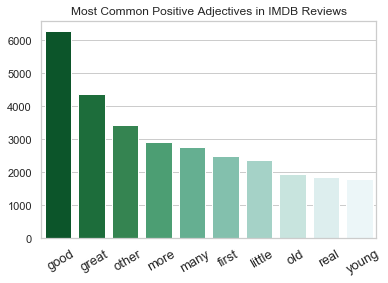

In [238]:
# POSITIVE ADJECTIVES
# first, separate labels and values

labels, values= zip(*pos_adj_count)

indexes = np.arange(len(labels))
width = 1

sns.set(style="whitegrid")

ax = sns.barplot(indexes, values, palette="BuGn_r")

plt.xticks(indexes + width * 0.1, labels, rotation=30);
plt.tick_params(axis='x', labelsize=13)
plt.title("Most Common Positive Adjectives in IMDB Reviews");

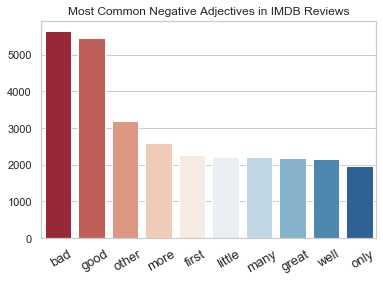

In [237]:
# NEGATIVE ADJECTIVES
# first, separate labels and values

labels, values= zip(*neg_adj_count)

indexes = np.arange(len(labels))
width = 1

sns.set(style="whitegrid")

ax = sns.barplot(indexes, values, palette="RdBu")

plt.xticks(indexes + width * 0.1, labels, rotation=30); # we use the semicolumn to avoid plotting text on the output
plt.tick_params(axis='x', labelsize=13)
plt.title("Most Common Negative Adjectives in IMDB Reviews");

### Analysis

On this project our goal was to use spacy to discover the most popular adjectives used in movie reviews depending on the sentiment. We used the Part-of Speech predictor to filter the words we wanted to keep.

We discovered that "good" is the first most common adjective for positive reviews, but surprisingly it was also ranked as the second most common adjective for negative reviews. It is an interesting finding that could be investigated further, like using bigrams to discover the common words used before and after "good" according to the sentiment.

Use spacy to perform analysis and not just Machine Learning predictions is a valuable tool for any data scientist/analyst. The possibilities are huge, and much more exploration can be done in that context.